In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import numpy
import warnings
import pandas
import matplotlib.pyplot as plot
import seaborn as sbn

In [4]:
APPL = pandas.read_csv("/content/drive/MyDrive/Datasets/AAPL.csv")
GOOG = pandas.read_csv("/content/drive/MyDrive/Datasets/GOOG.csv")
TESL = pandas.read_csv("/content/drive/MyDrive/Datasets/TSLA.csv")

# Preprocess Apple dataset

In [5]:
APPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600


In [6]:
APPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10797 entries, 0 to 10796
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10797 non-null  object 
 1   Open       10797 non-null  float64
 2   High       10797 non-null  float64
 3   Low        10797 non-null  float64
 4   Close      10797 non-null  float64
 5   Adj Close  10797 non-null  float64
 6   Volume     10797 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 590.6+ KB


In [7]:
# Drop rows with NULL values
APPL.dropna(inplace = True)

In [8]:
# Update datatypes of columns such as Date, Volume and Open
APPL["Date"] = pandas.to_datetime(APPL["Date"])
APPL = APPL.astype({"Volume": float})

In [9]:
# Sort the dataset by Date
APPL = APPL.sort_values(by = 'Date', ignore_index = True)

In [10]:
# Keep only rows with date greater than 2017-01-01
APPL = APPL[APPL["Date"] >= '2017-01-01'].reset_index(drop = True)

In [11]:
APPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1.704000e+03
mean,97.145465,98.249581,96.114909,97.230357,95.617295,1.092791e+08
std,52.177618,52.792078,51.597979,52.216007,52.640927,5.370380e+07
min,28.950001,29.082500,28.690001,29.004999,27.029022,3.145820e+07
25%,46.012501,46.412501,45.636875,46.025001,44.155288,7.479430e+07
50%,80.650002,81.152500,79.735001,80.707500,78.995968,9.516400e+07
75%,146.862503,148.517502,145.522503,146.840000,145.470535,1.290577e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,4.479400e+08


# Preprocess Google dataset

In [12]:
GOOG.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [13]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4819 non-null   object 
 1   Open       4819 non-null   float64
 2   High       4819 non-null   float64
 3   Low        4819 non-null   float64
 4   Close      4819 non-null   float64
 5   Adj Close  4819 non-null   float64
 6   Volume     4819 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 263.7+ KB


In [14]:
# Drop rows with NULL values
GOOG.dropna(inplace = True)

In [15]:
# Change Datatypes of Columns such as Date and Volume
GOOG["Date"] = pandas.to_datetime(GOOG["Date"])
GOOG = GOOG.astype({"Volume": float})

In [16]:
# Sort the Dataset by Date
GOOG = GOOG.sort_values(by = 'Date', ignore_index = True)

In [17]:
# Keep only rows with date greater than 2017-01-01
GOOG = GOOG[GOOG["Date"] >= '2017-01-01'].reset_index(drop = True)

In [18]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1.704000e+03
mean,83.336361,84.271480,82.488038,83.399729,83.399729,3.024250e+07
std,32.784316,33.177064,32.412667,32.785701,32.785701,1.322279e+07
min,38.940498,39.481499,38.790001,39.306999,39.306999,6.936000e+06
25%,55.267374,55.919998,54.688787,55.227125,55.227125,2.181552e+07
50%,72.137001,72.618500,71.332752,72.014000,72.014000,2.677500e+07
75%,112.953247,114.217312,111.621126,112.748247,112.748247,3.414200e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.241400e+08


# Preprocess Amazon dataset

In [19]:
TESL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-20,1.602000,1.630000,1.491333,1.508000,1.508000,34198500
1,2011-01-21,1.541333,1.572667,1.514000,1.536000,1.536000,18255000
2,2011-01-24,1.568667,1.654000,1.548667,1.632667,1.632667,24676500
3,2011-01-25,1.643333,1.659333,1.601333,1.645333,1.645333,19072500
4,2011-01-26,1.647333,1.658667,1.606667,1.650000,1.650000,16198500


In [20]:
TESL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3202 non-null   object 
 1   Open       3202 non-null   float64
 2   High       3202 non-null   float64
 3   Low        3202 non-null   float64
 4   Close      3202 non-null   float64
 5   Adj Close  3202 non-null   float64
 6   Volume     3202 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 175.2+ KB


In [21]:
# Drop rows with NULL values
TESL.dropna(inplace = True)

In [22]:
# Change Datatypes of Columns such as Date and Volume
TESL["Date"] = pandas.to_datetime(TESL["Date"])
TESL = TESL.astype({"Volume": float})

In [23]:
# Sort the Dataset by Date
TESL = TESL.sort_values(by = 'Date', ignore_index = True)

In [24]:
# Keep only rows with date greater than 2017-01-01
TESL = TESL[TESL["Date"] >= '2017-01-01'].reset_index(drop = True)

In [25]:
TESL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1.704000e+03
mean,124.651522,127.471574,121.630754,124.634054,124.634054,1.280486e+08
std,114.082480,116.649984,111.242940,113.978713,113.978713,8.149646e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,20.983834,21.264666,20.629834,21.013666,21.013666,7.609268e+07
50%,56.806334,57.777332,55.151999,56.446666,56.446666,1.042647e+08
75%,229.369163,234.665829,223.720837,229.757496,229.757496,1.503475e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Exploratory Data Analysis

In [26]:
Datasets= [APPL,TESL,GOOG]
Datasets_title=["Apple","Tesla","Google"]

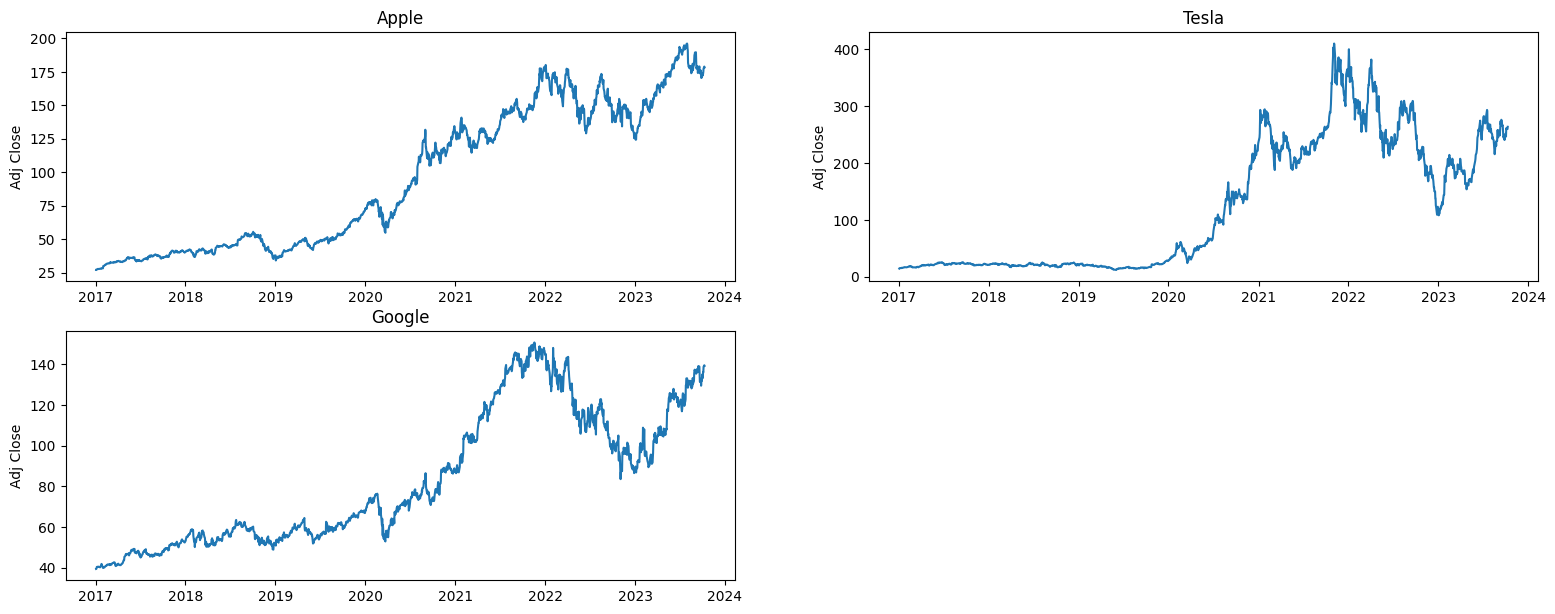

In [27]:
# Let's examine the closing prices
plot.figure(figsize=(19, 11))
for index, dataset in enumerate(Datasets):
  plot.subplot(3, 2, index + 1)
  plot.plot(dataset["Date"], dataset["Adj Close"])
  plot.title(Datasets_title[index])
  plot.ylabel('Adj Close')



The graph above shows that Telsa shares increased significantly between 2020 and 2021.

If we keep up with the news, it might be because


1.   Sales of Emission Credits
2.   Tesla is joining the Rapidly Expanding Compact SUV Market
3.   Commencing Chinese manufacturing

We may observe that COVID-19 is the main factor influencing the 2020 – 2021 term for the remaining Companies.




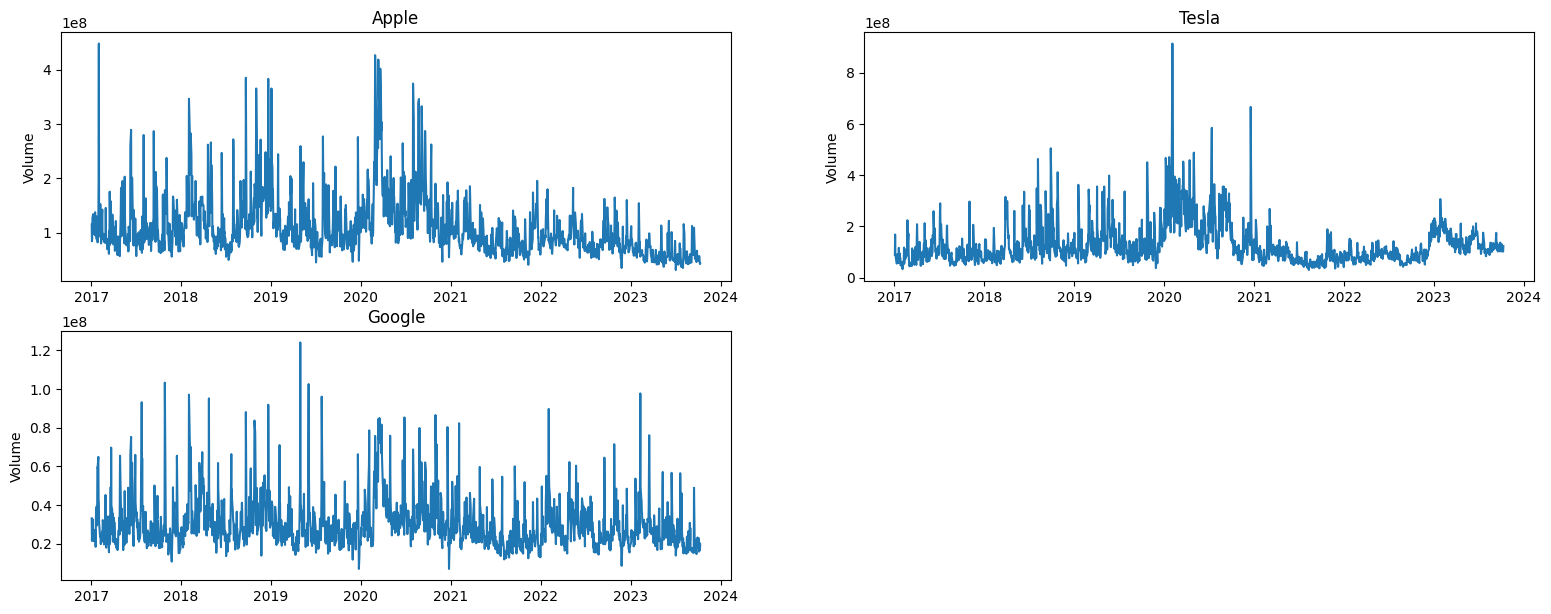

In [28]:
# Let's now plot the total Volume of stocks that are traded every day.

plot.figure(figsize=(19, 11))
for index, dataset in enumerate(Datasets):
  plot.subplot(3, 2, index + 1)
  plot.plot(dataset["Date"], dataset["Volume"])
  plot.title(Datasets_title[index])
  plot.ylabel('Volume')

Now that we've seen the daily volume traded and closing price visualisations, let's compute the stock's moving average.

# Moving average of each stock

In [29]:
moving_average_by_day = [5, 15, 45]
for moving_average in moving_average_by_day:
  for dataset in Datasets:
    column_name = f'Moving Average for {moving_average} days'
    dataset[column_name] = dataset["Adj Close"].rolling(moving_average).mean()

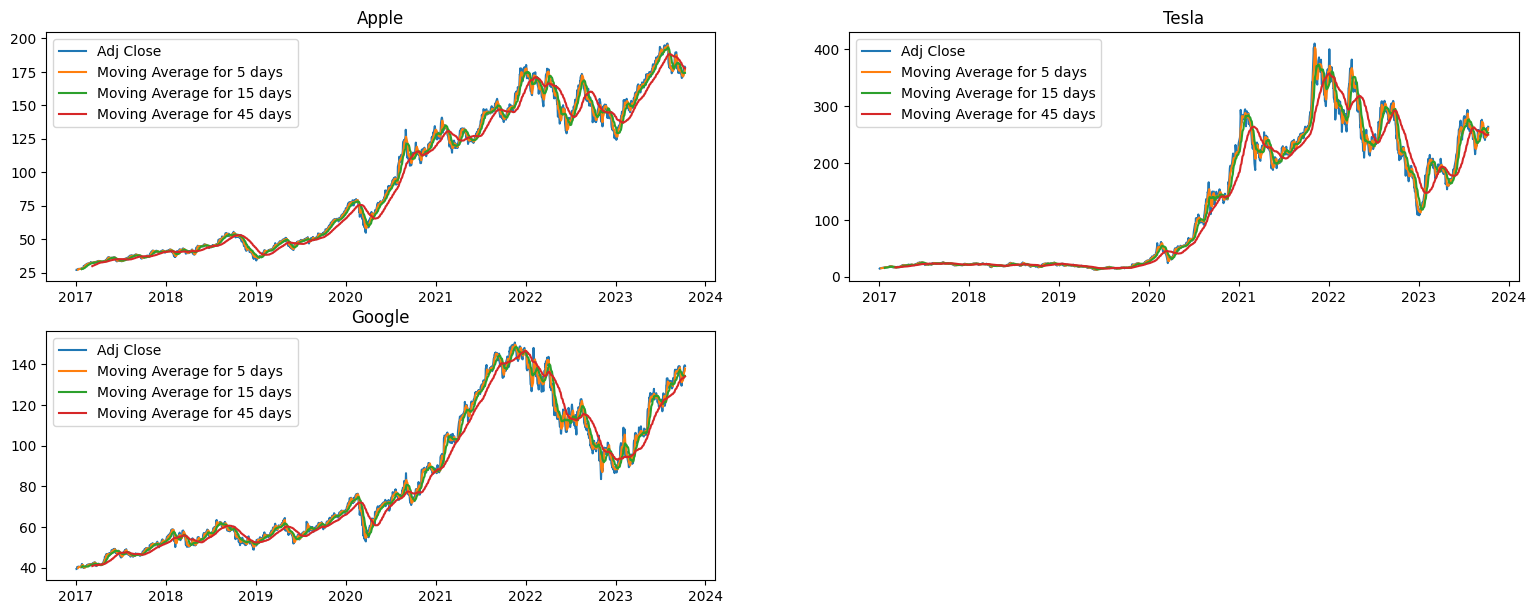

In [30]:
plot.figure(figsize=(19, 11))
for index, dataset in enumerate(Datasets):
  plot.subplot(3, 2, index + 1)
  plot.plot(dataset["Date"], dataset["Adj Close"])
  plot.plot(dataset["Date"], dataset["Moving Average for 5 days"])
  plot.plot(dataset["Date"], dataset["Moving Average for 15 days"])
  plot.plot(dataset["Date"], dataset["Moving Average for 45 days"])
  plot.title(Datasets_title[index])
  plot.legend(("Adj Close", "Moving Average for 5 days", "Moving Average for 15 days", "Moving Average for 45 days"))

# Daily Return of each stock

Let's now examine the stock's risk analysis. To achieve this, we must examine the stock's daily fluctuations more closely than merely its absolute value.

In [31]:
# The percentage change between the current element and a previous element is determined by the #pct_change() function.
# By default, this function determines the percentage change from the row that came before it.

for dataset in Datasets:
  dataset["Daily Return"] = dataset["Adj Close"].pct_change()

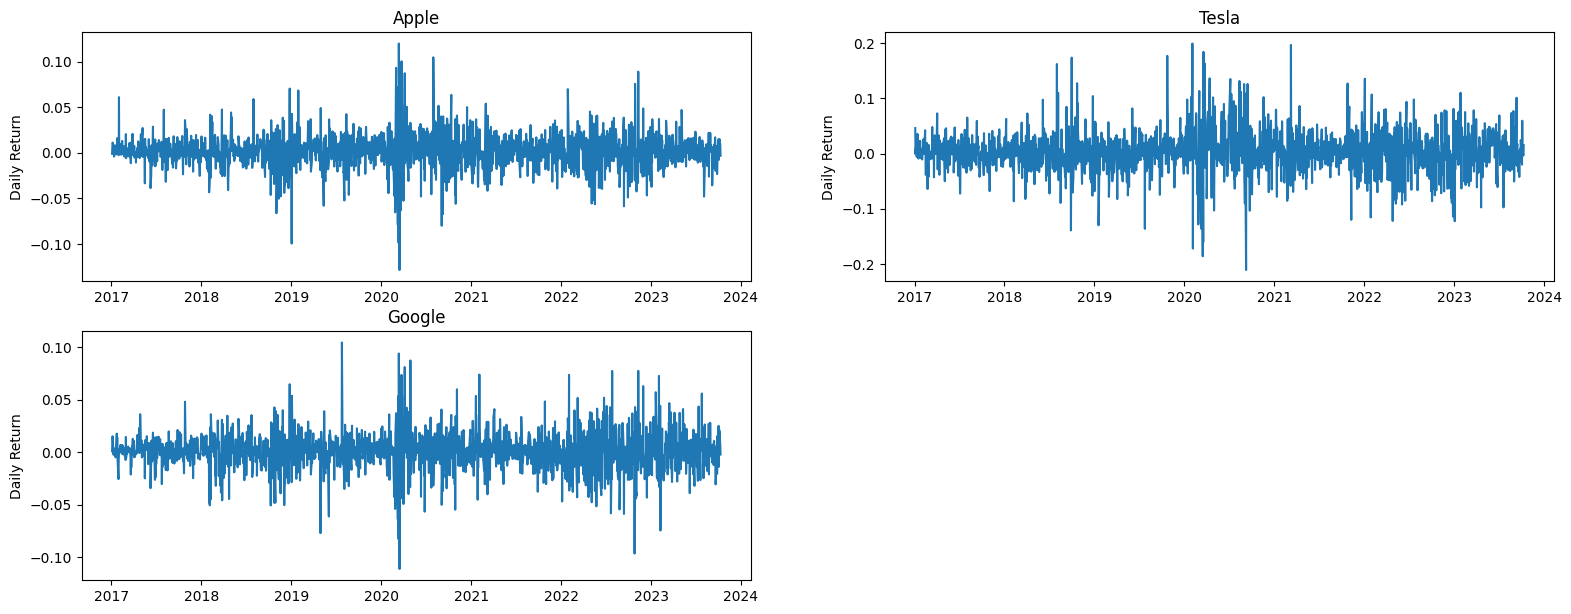

In [32]:
plot.figure(figsize=(19, 11))
for index, dataset in enumerate(Datasets):
  plot.subplot(3, 2, index + 1)
  plot.plot(dataset["Date"], dataset["Daily Return"])
  plot.title(Datasets_title[index])
  plot.ylabel('Daily Return')

Let's now use a histogram to obtain an overall view of the average daily return.

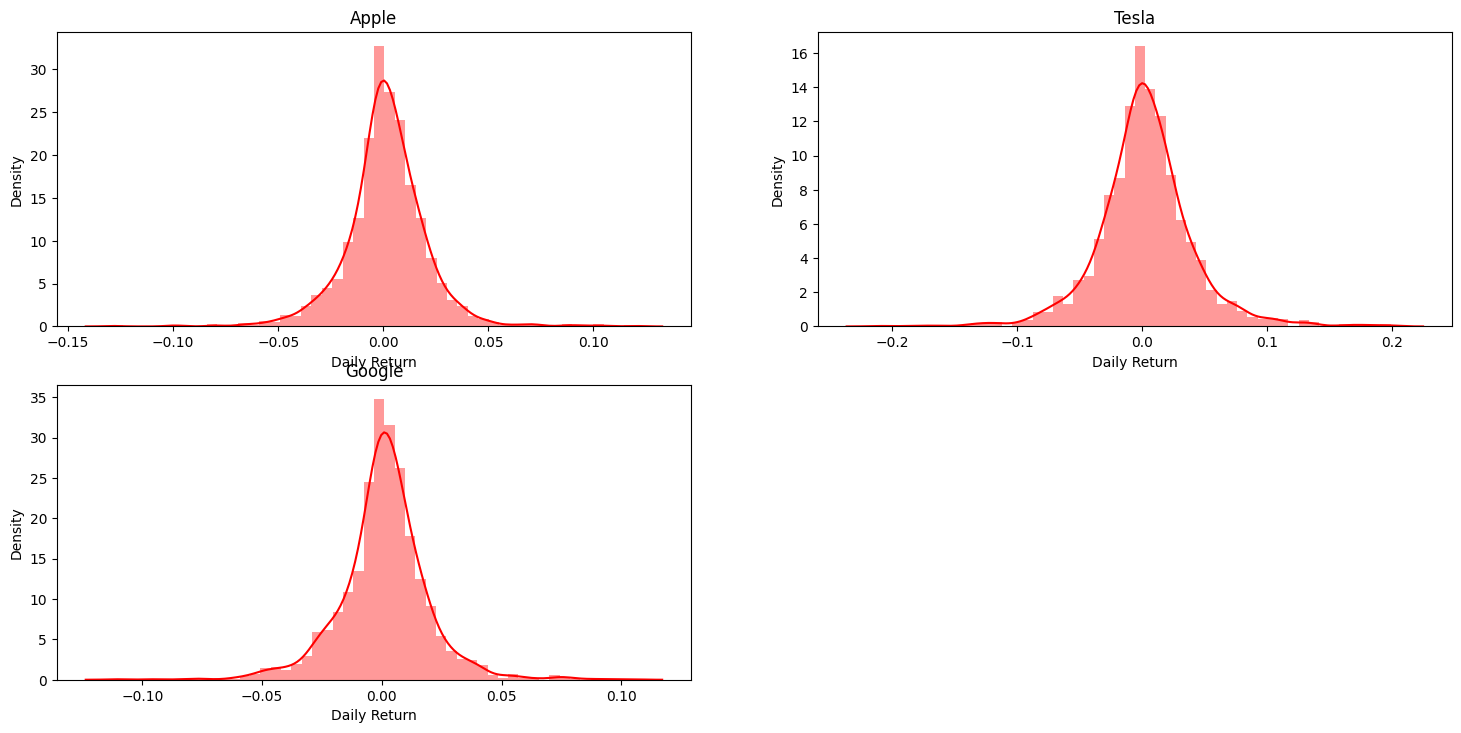

In [33]:
warnings.filterwarnings('ignore')

plot.figure(figsize=(18, 13))
for index, dataset in enumerate(Datasets):
  plot.subplot(3, 2, index + 1)
  sbn.distplot(dataset["Daily Return"].dropna(), color = "red")
  plot.title(Datasets_title[index])

Kurtosis determines whether extreme values are present in a distribution's tails.

In [34]:
print("Kurtosis Value")
for index, dataset in enumerate(Datasets):
  print(f'{Datasets_title[index]}: {dataset["Daily Return"].kurtosis()}')

Kurtosis Value
Apple: 5.347340678649221
Tesla: 3.8475003591983037
Google: 4.147322050544748


Finding extreme daily return values is uncommon, as shown by the above graph and the positive kurtosis value.

# Correlation between the closing prices of various stocks

In [35]:
# Companies_return contain closing price of all the companies
Datasets_returns = pandas.DataFrame()
Datasets_returns["APPL"] = APPL["Adj Close"]
Datasets_returns["TESL"] = TESL["Adj Close"]
Datasets_returns["GOOG"] = GOOG["Adj Close"]
Datasets_returns.head()

,APPL,TESL,GOOG
0,27.059303,14.466000,39.306999
1,27.029022,15.132667,39.345001
2,27.166470,15.116667,39.701000
3,27.469332,15.267333,40.307499
4,27.720936,15.418667,40.332500


In [36]:
# The datasets_daily_returns includes each company's percentage daily return.

datasets_daily_returns = Datasets_returns.pct_change()
datasets_daily_returns.head()


,APPL,TESL,GOOG
0,NaN,NaN,NaN
1,-0.001119,0.046085,0.000967
2,0.005085,-0.001057,0.009048
3,0.011148,0.009967,0.015277
4,0.009159,0.009912,0.000620


To obtain precise numerical values for the correlation between the closing prices of the stocks, let's now create a correlation plot.

<Axes: >

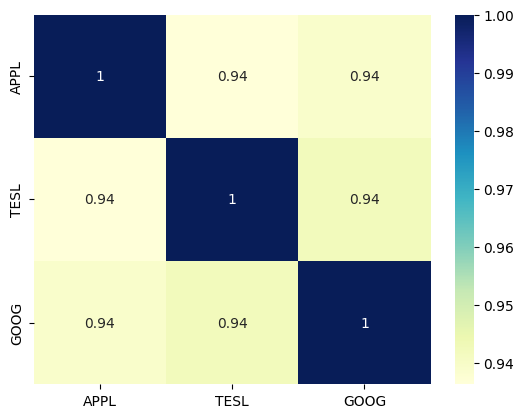

In [37]:
sbn.heatmap(Datasets_returns.corr(), annot=True, cmap="YlGnBu")

<Axes: >

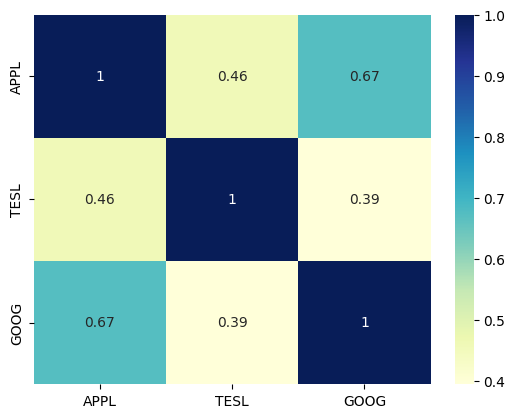

In [38]:
sbn.heatmap(datasets_daily_returns.corr(), annot=True, cmap="YlGnBu")

The above plot indicates that the companies with the highest correlation in daily stock returns were Apple and Google.

# Determining the risk by investing in a specific stock

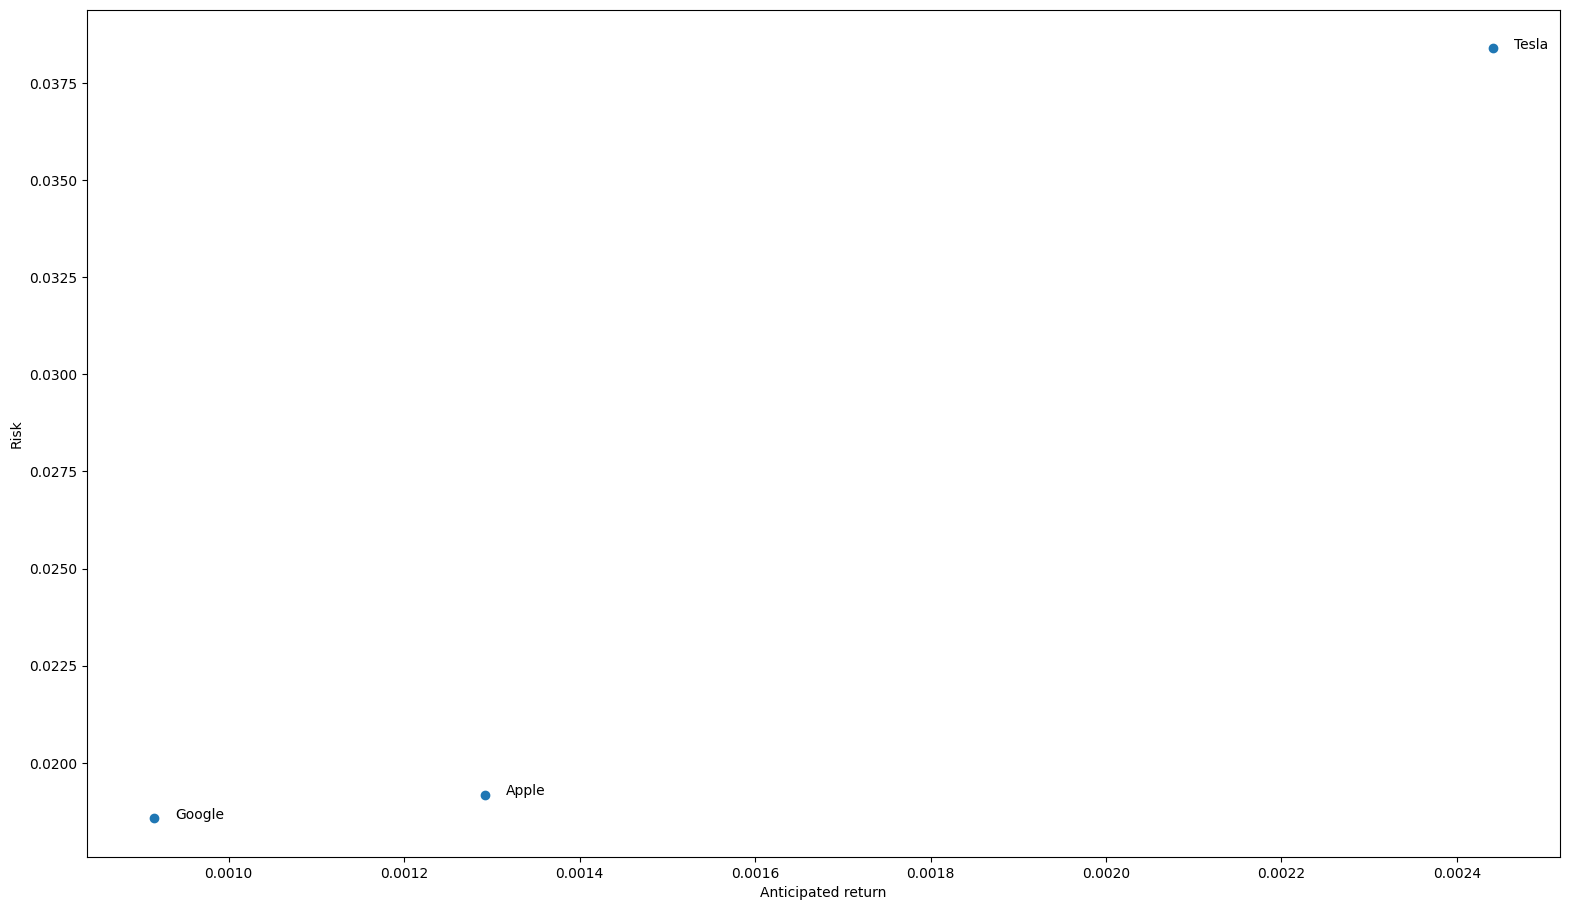

In [39]:
daily_returns = datasets_daily_returns.dropna()

plot.figure(figsize=(19, 11))
plot.scatter(daily_returns.mean(), daily_returns.std())
plot.xlabel('Anticipated return')
plot.ylabel('Risk')

for label, x, y in zip(Datasets_title, daily_returns.mean(), daily_returns.std()):
    plot.annotate(label, xy = (x, y), xytext = (15, 0), textcoords = 'offset points')

We can observe from the above graph that Tesla has the highest risk factor and the highest expected returns, whereas Google is the lowest expected returns and lowest risk factor.

In [42]:
# Downloading preprocessed datasets
dataframe = pandas.DataFrame(APPL)
dataframe.to_csv("preprocessed_AAPL", index=False)

dataframe = pandas.DataFrame(GOOG)
dataframe.to_csv("preprocessed_GOOG", index=False)

dataframe = pandas.DataFrame(TESL)
dataframe.to_csv("preprocessed_TSLA", index=False)